In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [20, 20]

% matplotlib inline

UsageError: Line magic function `%` not found.


### Read data

In [2]:
HUMAN_EVAL = True

ABSOLUTE_PATH = '.'
DATA_FOLDER = ABSOLUTE_PATH + f'/../../data/'
OUTPUT_FOLDER = f'aggregation/human_evaluated/plots/' if HUMAN_EVAL else f'aggregation/no_human_evaluated/plots/'

In [3]:
STATS_FILES = [
    'g1-piek/scenario1/automatic_evaluations/g1s1',
    'g1-piek/scenario2/automatic_evaluations/g1s2',
    'g2-jaap/scenario1/automatic_evaluations/g2s1',
    'g2-jaap/scenario2/automatic_evaluations/g2s2',
    'g4-tae/scenario1/automatic_evaluations/g4s1',
    'g4-tae/scenario2/automatic_evaluations/g4s2',
]
if not HUMAN_EVAL:
    STATS_FILES.extend([
        # 'e1-blender_leolani_spacy/scenario1/automatic_evaluations/e1s1',
        'e1-blender_leolani_spacy/scenario2/automatic_evaluations/blender-agent',
        'e2-blender_eliza_spacy/scenario1/automatic_evaluations/blender-eliza',
        'e3-friends_oie/scenario1/automatic_evaluations/monica-chandler'])

COLUMNS_TO_DROP = [
    'GROUP A - Average node connectivity',
    'GROUP A - Number of components',

    'GROUP B - Class property ratio', 'GROUP B - Property class ratio',
    'GROUP B - Total classes', 'GROUP B - Total properties',
    'GROUP B - Inheritance richness',
    'GROUP B - Total general concept inclusions', 'GROUP B - Total concept assertions',
    'GROUP B - Total role assertions',
    'GROUP B - Total instances', 'GROUP B - Total entities', 'GROUP B - Total tBox axioms',
    'GROUP B - Relationship richness', 'GROUP B - Attribute richness',

    'GROUP C - Total triples', 'GROUP C - Total world instances',
    'GROUP C - Total interactions',
    'GROUP C - Total claims', 'GROUP C - Total perspectives', 'GROUP C - Total mentions',
    'GROUP C - Total conflicts',
    'GROUP C - Total sources', 'GROUP C - Total utterances',
]
if not HUMAN_EVAL:
    COLUMNS_TO_DROP.extend([
        'System llh', 'MLM llh', 'USR DLcontext', 'USR DLfact',

        'Overall Human Rating', 'Interesting', 'Engaging', 'Specific',
        'Relevant', 'Correct', 'Semantically Appropriate', 'Understandable', 'Fluent', ])

COLUMNS_TO_KEEP = [
    'GROUP A - Total nodes', 'GROUP A - Total edges',
    'GROUP A - Average degree', 'GROUP A - Average degree centrality', 'GROUP A - Average closeness',
    'GROUP A - Average degree connectivity', 'GROUP A - Average assortativity',
    'GROUP A - Number of strong components',
    'GROUP A - Centrality entropy', 'GROUP A - Closeness entropy', 'GROUP A - Sparseness',

    'GROUP B - Total axioms',
    'GROUP B - Average population',

    'GROUP C - Ratio claim to triples', 'GROUP C - Ratio perspectives to triples',
    'GROUP C - Ratio conflicts to triples',
    'GROUP C - Ratio perspectives to claims', 'GROUP C - Ratio mentions to claims',
    'GROUP C - Ratio conflicts to claims', 'GROUP C - Average perspectives per claim',
    'GROUP C - Average mentions per claim', 'GROUP C - Average turns per interaction',
    'GROUP C - Average claims per source', 'GROUP C - Average perspectives per source',

    'Conversation']
if HUMAN_EVAL:
    COLUMNS_TO_KEEP.extend([
        'System llh', 'MLM llh', 'USR DLcontext', 'USR DLfact',

        'Overall Human Rating', 'Interesting', 'Engaging', 'Specific',
        'Relevant', 'Correct', 'Semantically Appropriate', 'Understandable', 'Fluent', ])



In [4]:
convo_dfs = []

for file in STATS_FILES:
    # Read data
    convo_df = pd.read_csv(DATA_FOLDER + f"{file}.csv", header=0)

    # Format all equally
    convo_df['Conversation'] = file.split('/')[-1]
    convo_df = convo_df.set_index('Turn')

    # Manage metrics to be considered 
    columns_to_drop = [c for c in COLUMNS_TO_DROP if c in convo_df.columns]
    convo_df.drop(columns=columns_to_drop, inplace=True)
    columns_missing = [c for c in COLUMNS_TO_KEEP if c not in convo_df.columns]

    if HUMAN_EVAL:
        # rename
        convo_df.rename(columns={'System llh': 'AUTOMATIC - System llh', 'MLM llh': 'AUTOMATIC - MLM llh',
                                 'USR DLcontext': 'AUTOMATIC - USR DLcontext', 'USR DLfact': 'AUTOMATIC - USR DLfact'},
                        inplace=True)
        convo_df.rename(columns={'Overall Human Rating': 'HUMAN - Overall Human Rating',
                                 'Interesting': 'HUMAN - Interesting', 'Engaging': 'HUMAN - Engaging',
                                 'Specific': 'HUMAN - Specific', 'Relevant': 'HUMAN - Relevant',
                                 'Correct': 'HUMAN - Correct',
                                 'Semantically Appropriate': 'HUMAN - Semantically Appropriate',
                                 'Understandable': 'HUMAN - Understandable',
                                 'Fluent': 'HUMAN - Fluent'}, inplace=True)

    # Show results
    print(f'{len(convo_df)} turns, {len(convo_df.columns)} metrics (missing {columns_missing} metrics')

    convo_dfs.append(convo_df)

83 turns, 38 metrics (missing [] metrics
57 turns, 38 metrics (missing [] metrics
46 turns, 38 metrics (missing [] metrics
56 turns, 38 metrics (missing [] metrics
78 turns, 38 metrics (missing [] metrics
97 turns, 38 metrics (missing [] metrics


### Average human per conversation

In [5]:
if HUMAN_EVAL:
    human_avg = pd.DataFrame()
    for convo_df in convo_dfs:
        human_avg[convo_df.loc[0, 'Conversation']] = convo_df[['HUMAN - Overall Human Rating', 'HUMAN - Interesting',
                                                               'HUMAN - Engaging', 'HUMAN - Specific',
                                                               'HUMAN - Relevant',
                                                               'HUMAN - Correct', 'HUMAN - Semantically Appropriate',
                                                               'HUMAN - Understandable', 'HUMAN - Fluent']].mean()

    human_avg.to_csv(DATA_FOLDER + f'aggregation/human_evaluated/' + f'detailed_average_per_conversation.csv')
    print(human_avg)


                                      g1s1      g1s2      g2s1      g2s2  \
HUMAN - Overall Human Rating      3.100402  3.412121  1.142857  1.086538   
HUMAN - Interesting               2.626506  2.939394  1.380952  1.596154   
HUMAN - Engaging                  2.783133  2.945455  3.095238  2.009615   
HUMAN - Specific                  2.863454  2.563636  2.190476  2.086538   
HUMAN - Relevant                  3.184739  3.872727  2.690476  2.836538   
HUMAN - Correct                   3.080321  3.909091  2.642857  2.644231   
HUMAN - Semantically Appropriate  2.991968  3.957576  2.666667  2.442308   
HUMAN - Understandable            3.706827  4.121212  3.380952  3.298077   
HUMAN - Fluent                    3.586345  4.151515  3.000000  2.615385   

                                      g4s1      g4s2  
HUMAN - Overall Human Rating      2.746622  2.290323  
HUMAN - Interesting               3.041667  2.196237  
HUMAN - Engaging                  2.871622  2.387097  
HUMAN - Specific   

In [6]:
if HUMAN_EVAL:
    inter_avg = human_avg.mean(axis=1)

    inter_avg.to_csv(DATA_FOLDER + f'aggregation/human_evaluated/' + f'detailed_average_across_conversation.csv')
    print(inter_avg)

HUMAN - Overall Human Rating        2.296477
HUMAN - Interesting                 2.296818
HUMAN - Engaging                    2.682026
HUMAN - Specific                    2.428809
HUMAN - Relevant                    2.959596
HUMAN - Correct                     2.946470
HUMAN - Semantically Appropriate    2.922351
HUMAN - Understandable              3.533140
HUMAN - Fluent                      3.330822
dtype: float64


In [7]:
if HUMAN_EVAL:
    convo_avg = human_avg.drop('HUMAN - Overall Human Rating').mean()

    convo_avg.to_csv(DATA_FOLDER + f'aggregation/human_evaluated/' + f'aggregated_average_per_conversation.csv')
    print(convo_avg)

g1s1    3.102912
g1s2    3.557576
g2s1    2.630952
g2s2    2.441106
g4s1    3.034347
g4s2    2.558132
dtype: float64


In [8]:
if HUMAN_EVAL:
    convos_avg = human_avg.drop('HUMAN - Overall Human Rating').mean().mean()

    # convos_avg.to_csv(DATA_FOLDER + f'aggregation/human_evaluated/' + f'aggregated_average_per_conversation.csv')
    print(convos_avg)

2.8875040202703683


### Correlate graph metrics with automatic and human evaluations

Compute correlations per conversation, then average

In [9]:
def plot_correlations(df_to_plot, mask, name, output_folder=OUTPUT_FOLDER):
    # Plot
    plt.figure()
    g = sns.heatmap(df_to_plot, mask=mask, annot=False, fmt=".2f",
                    cmap="YlGnBu", cbar_kws={"shrink": .3, "location": "top"},
                    cbar=True, center=0,
                    square=True)

    g.figure.savefig(DATA_FOLDER + f"{name}" + output_folder + f"Correlation heatmap.png", dpi=300)


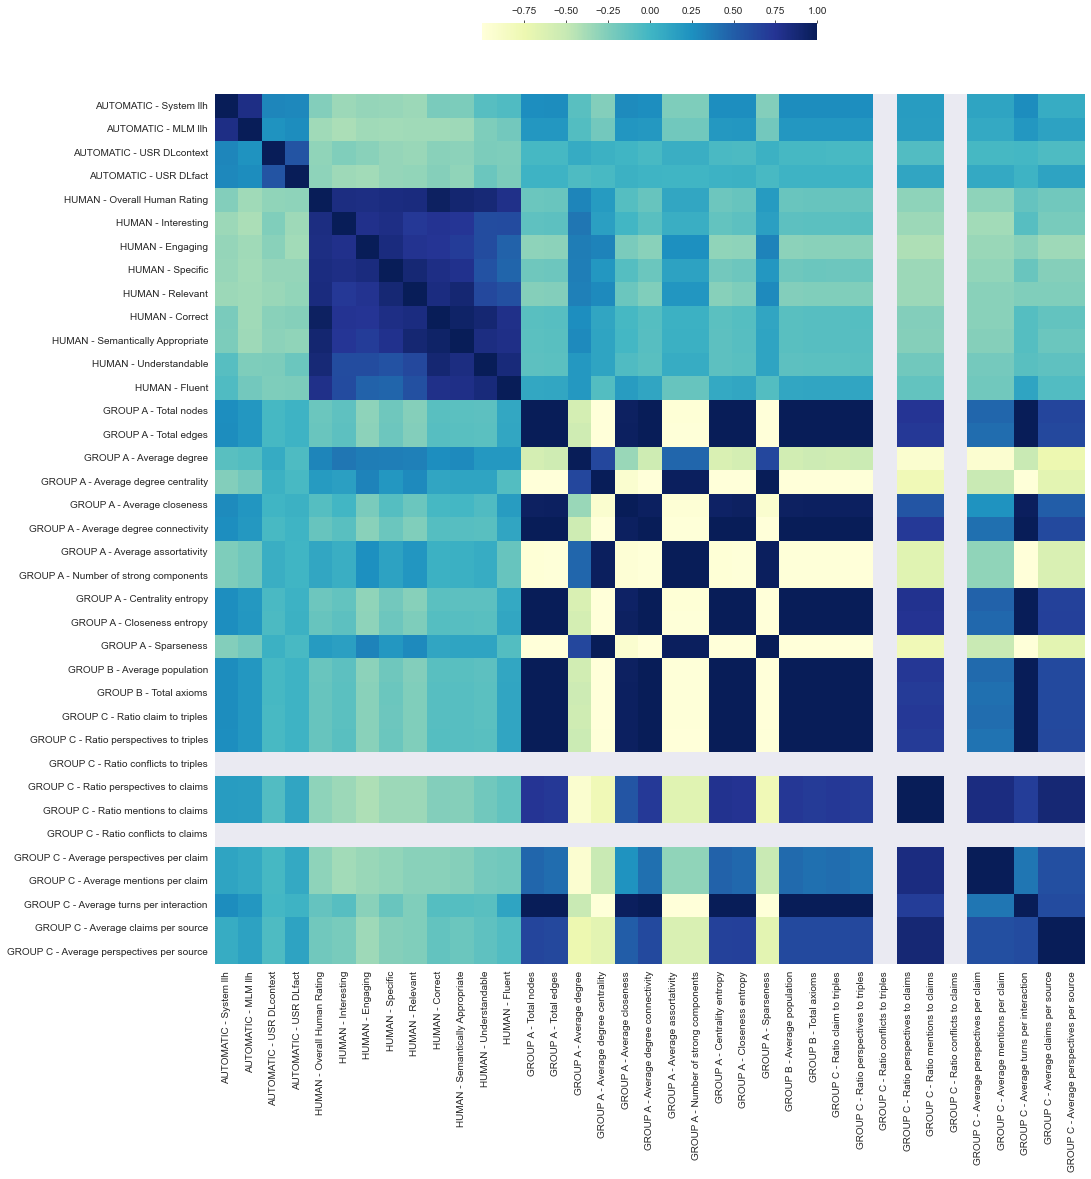

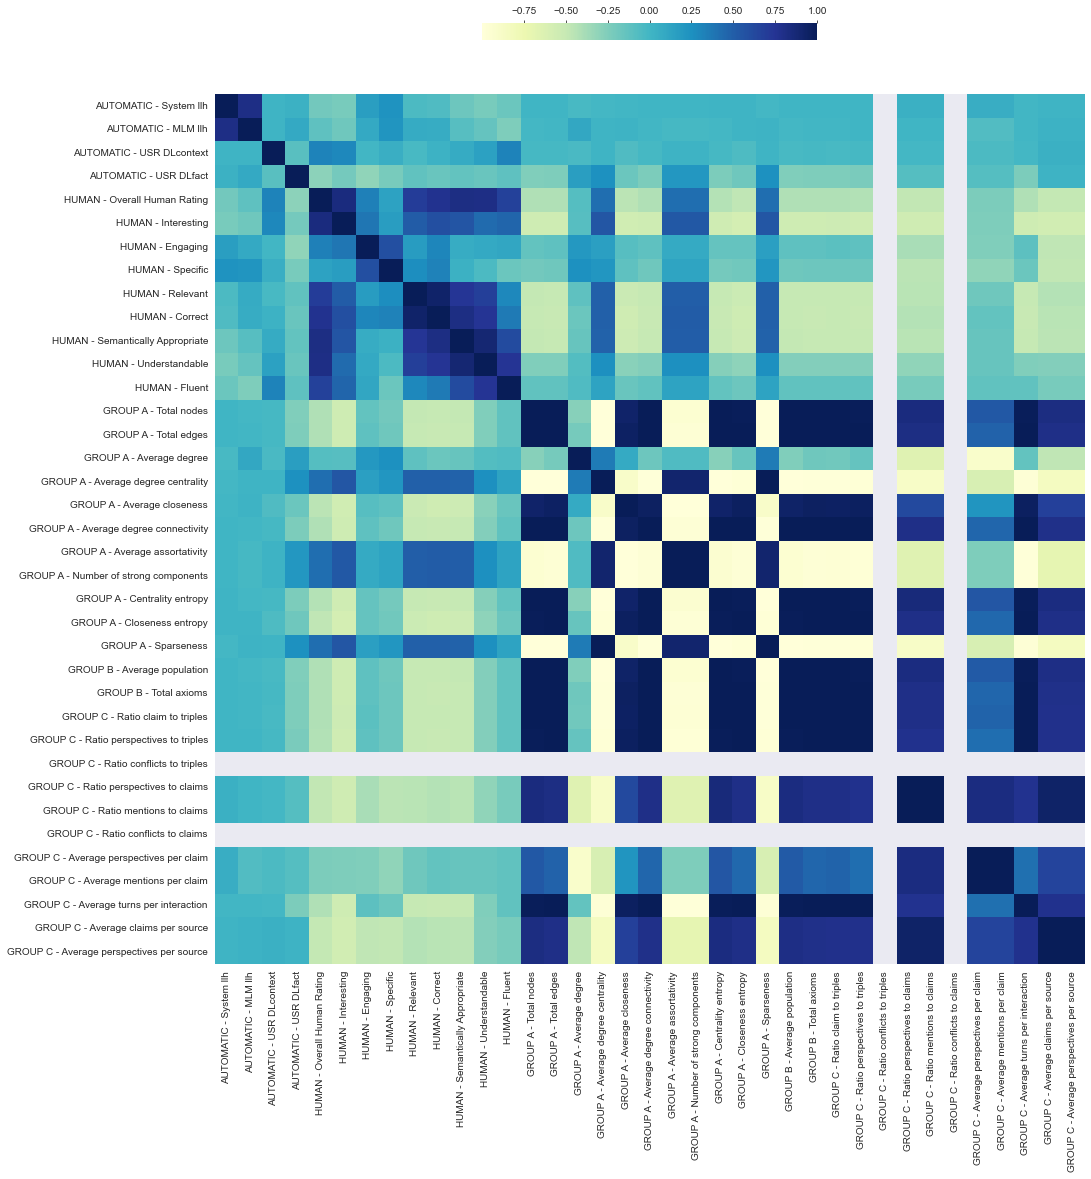

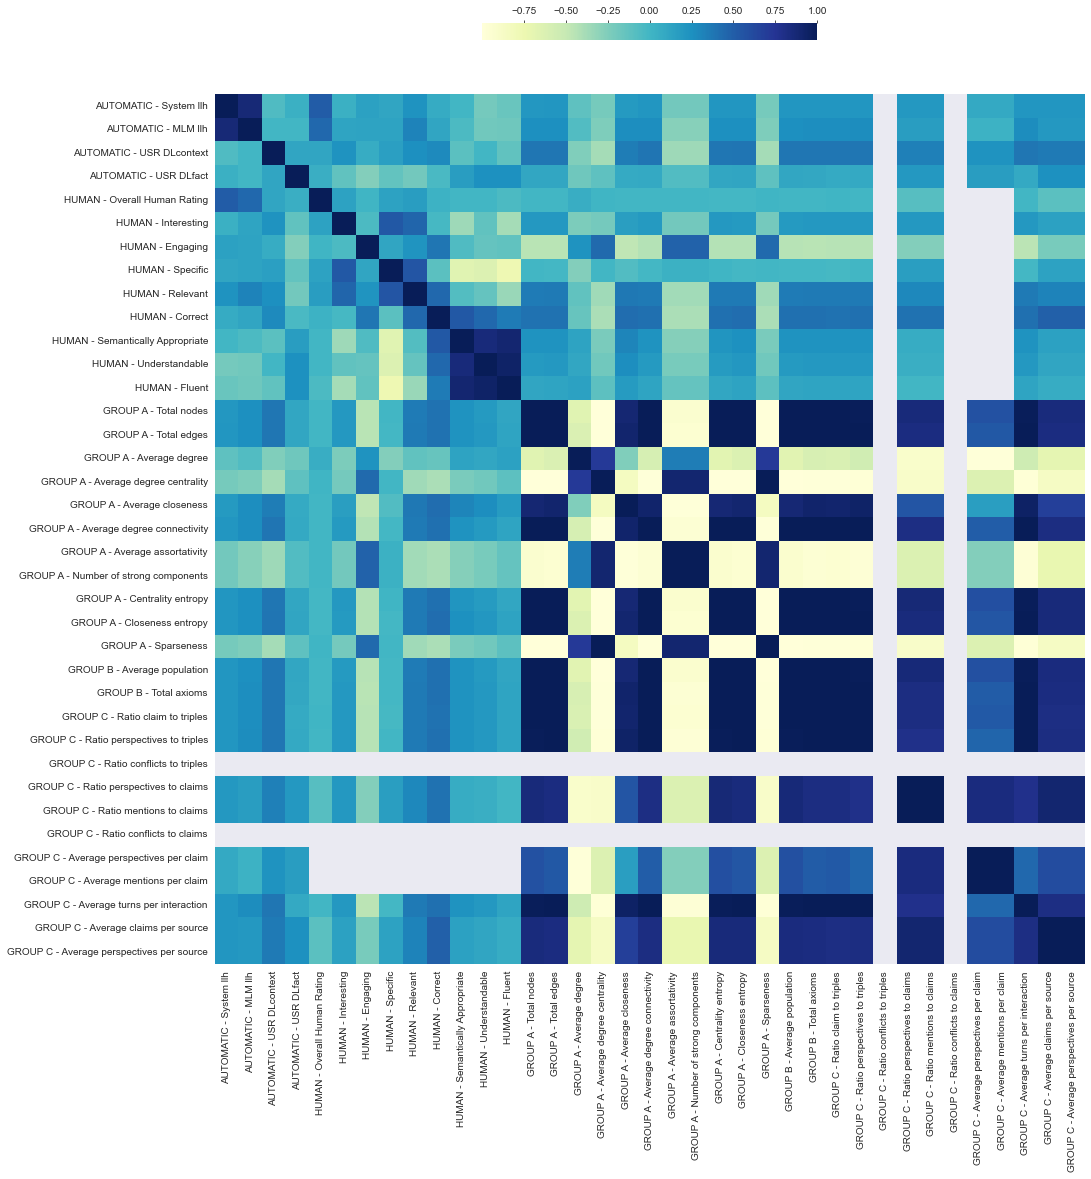

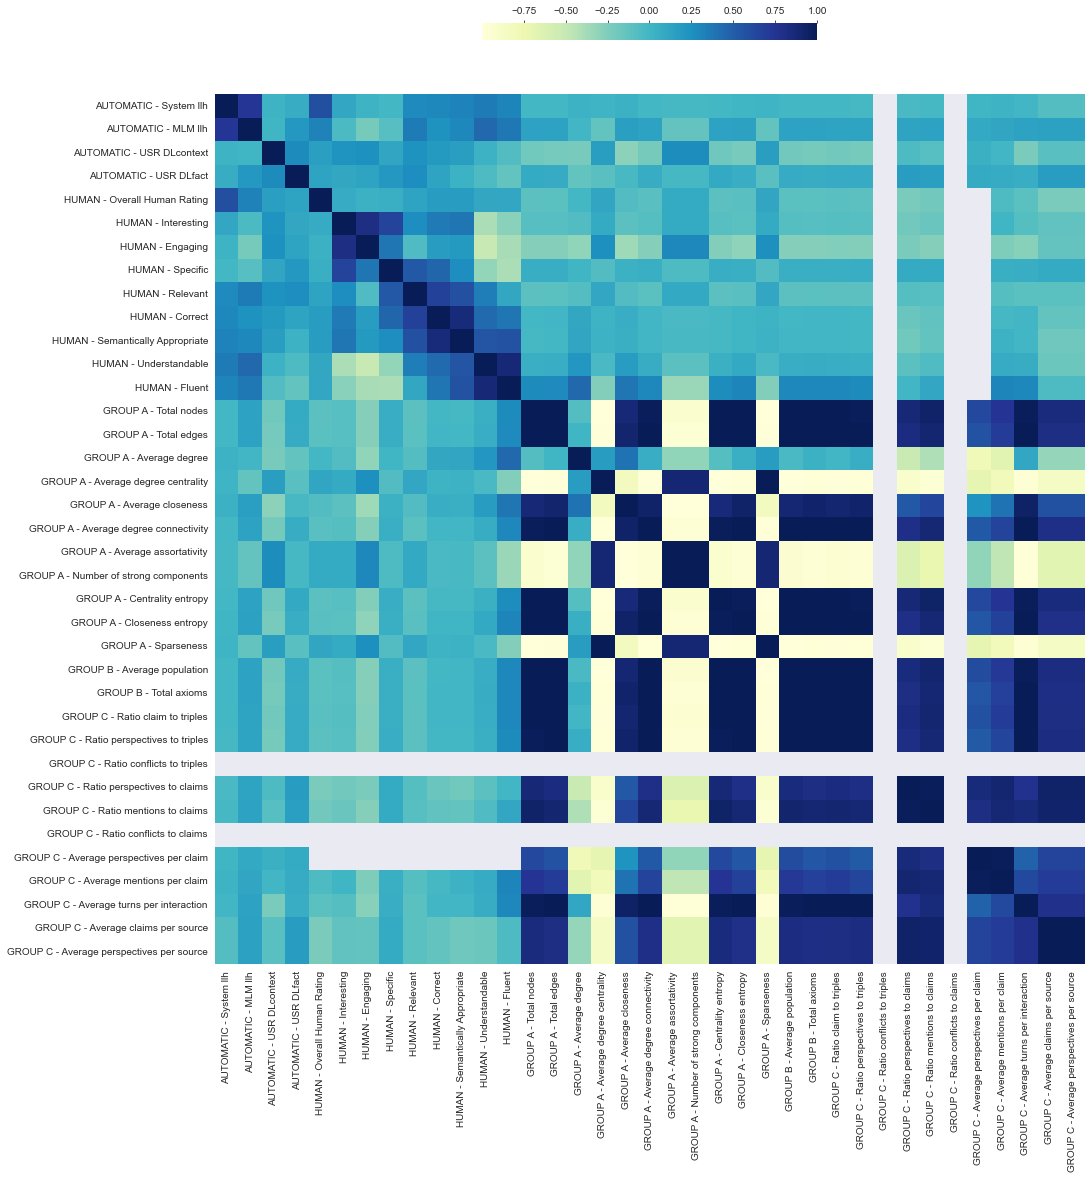

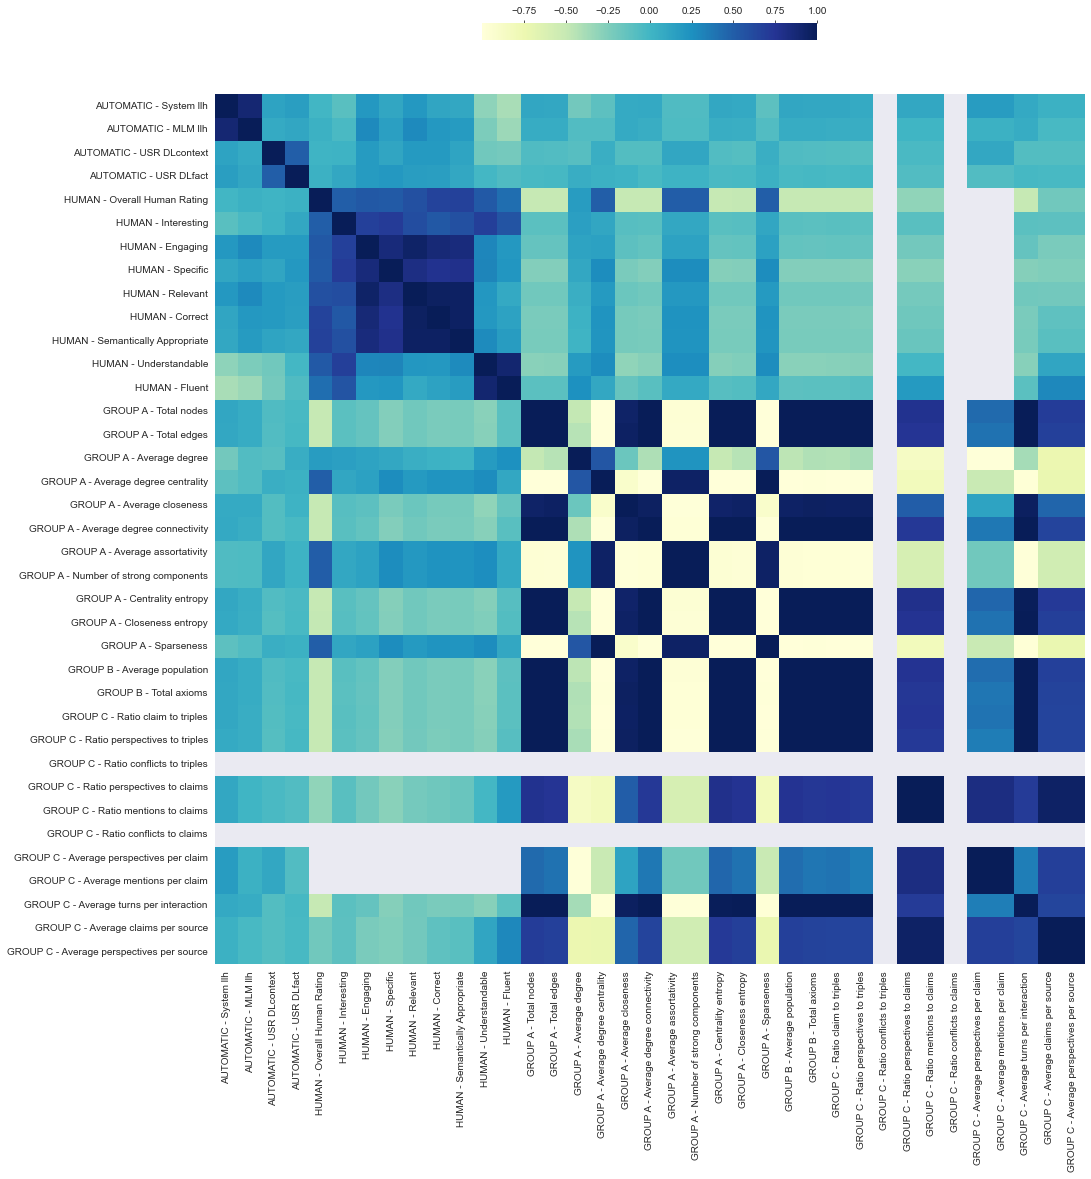

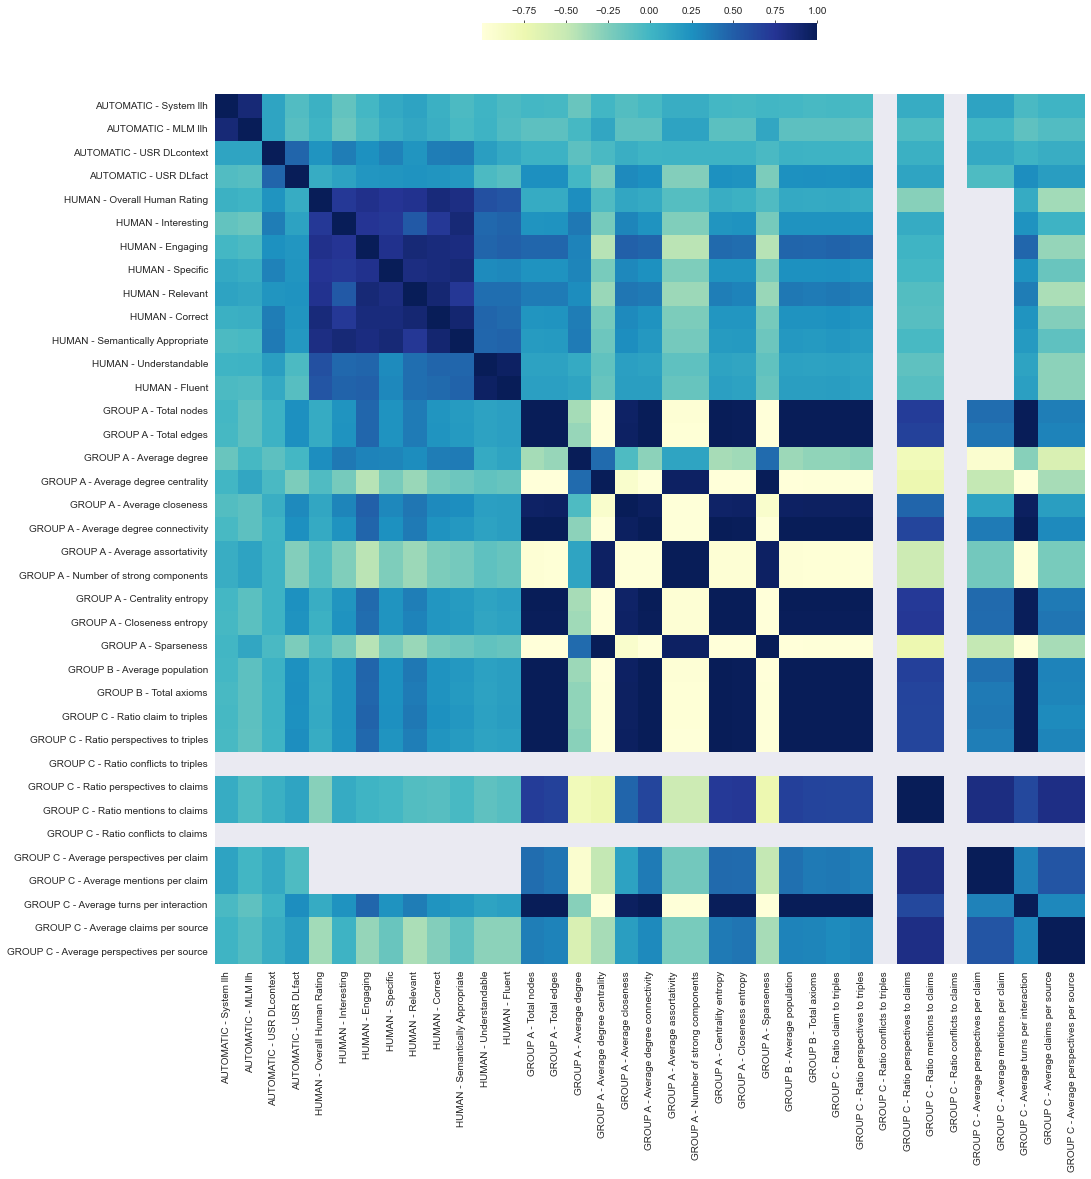

In [10]:
# Plot correlations per conversation
if HUMAN_EVAL:
    corr_dfs = []
    for convo_df, file_name in zip(convo_dfs, STATS_FILES):
        # Compute correlations
        corr_df = convo_df.corr(method='pearson')

        # Plot
        plot_name = file_name.rsplit('/', 2)[0]
        plot_correlations(corr_df, None, plot_name, output_folder=f'/plots/')

        corr_dfs.append(corr_df)


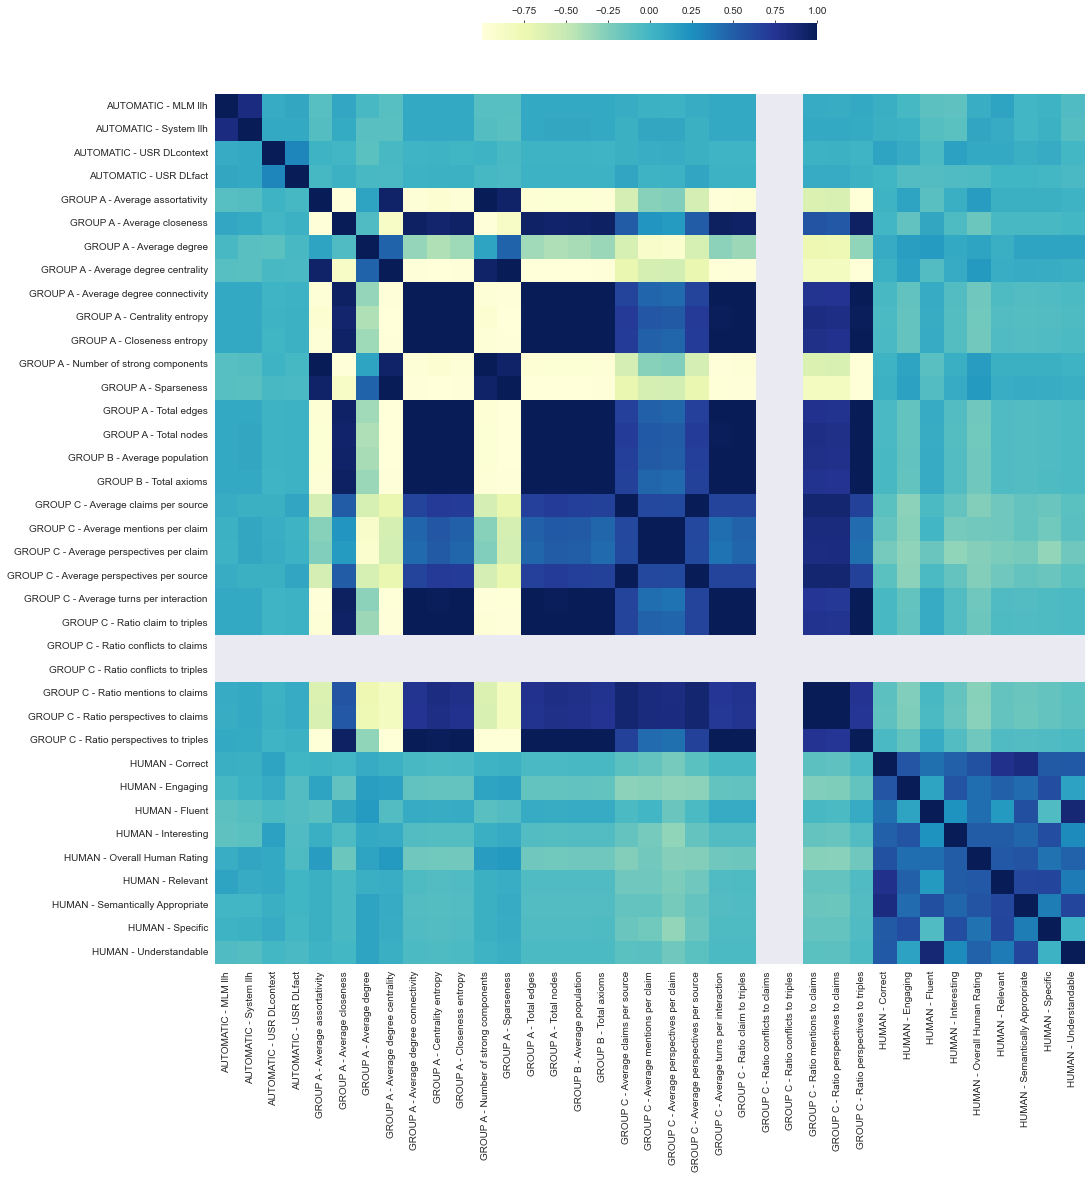

In [12]:
if HUMAN_EVAL:
    # Average conversations
    avg_df = pd.concat(corr_dfs).groupby(level=0).mean()
    avg_df = avg_df.reindex(sorted(avg_df.columns), axis=1)
    plot_correlations(avg_df, None, '')


In [13]:
if HUMAN_EVAL:
    # Average degree
    avg_df.loc[['HUMAN - Overall Human Rating', 'HUMAN - Interesting', 'HUMAN - Engaging', 'HUMAN - Specific',
                'HUMAN - Relevant', 'HUMAN - Correct', 'HUMAN - Semantically Appropriate', 'HUMAN - Understandable',
                'HUMAN - Fluent'],
               ['GROUP A - Average degree', 'GROUP A - Sparseness', 'AUTOMATIC - USR DLcontext',
                'AUTOMATIC - USR DLfact']]


[(0, 'AUTOMATIC - MLM llh'), (1, 'AUTOMATIC - System llh'), (2, 'AUTOMATIC - USR DLcontext'), (3, 'AUTOMATIC - USR DLfact'), (4, 'GROUP A - Average assortativity'), (5, 'GROUP A - Average closeness'), (6, 'GROUP A - Average degree'), (7, 'GROUP A - Average degree centrality'), (8, 'GROUP A - Average degree connectivity'), (9, 'GROUP A - Centrality entropy'), (10, 'GROUP A - Closeness entropy'), (11, 'GROUP A - Number of strong components'), (12, 'GROUP A - Sparseness'), (13, 'GROUP A - Total edges'), (14, 'GROUP A - Total nodes'), (15, 'GROUP B - Average population'), (16, 'GROUP B - Total axioms'), (17, 'GROUP C - Average claims per source'), (18, 'GROUP C - Average mentions per claim'), (19, 'GROUP C - Average perspectives per claim'), (20, 'GROUP C - Average perspectives per source'), (21, 'GROUP C - Average turns per interaction'), (22, 'GROUP C - Ratio claim to triples'), (23, 'GROUP C - Ratio conflicts to claims'), (24, 'GROUP C - Ratio conflicts to triples'), (25, 'GROUP C - Rat

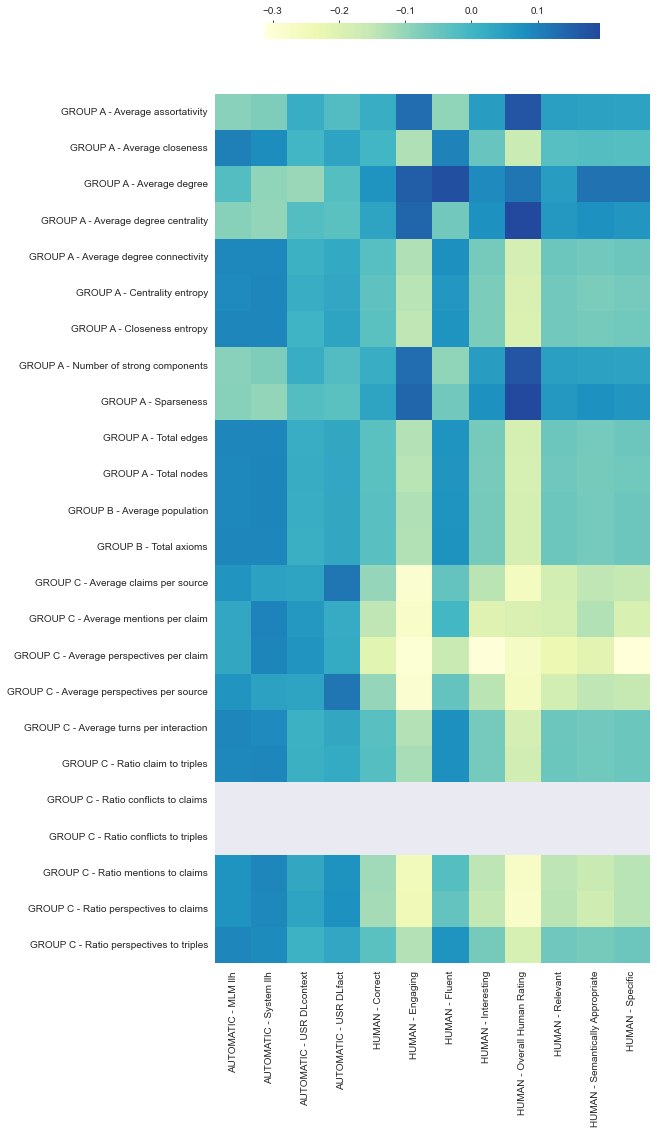

In [26]:
if HUMAN_EVAL:
    # Average conversations, zoomed in
    avg_df = pd.concat(corr_dfs).groupby(level=0).mean()
    avg_df = avg_df.reindex(sorted(avg_df.columns), axis=1)
    print([(i, el) for i, el in enumerate(avg_df.columns)])

    # Zoom into the rectangle we want (horizontal)
    # human_auto_metrics = np.r_[:4, 28:36]
    # # human_auto_metrics = np.r_[:4, 36:45]
    # avg_df = avg_df.loc[avg_df.columns[human_auto_metrics]]
    # avg_df = avg_df[avg_df.columns[4:-9]]

    # Zoom into the rectangle we want
    human_auto_metrics = np.r_[:4, 28:36]
    avg_df = avg_df.loc[avg_df.columns[4:-9]]
    avg_df = avg_df[avg_df.columns[human_auto_metrics]]

    # Plot
    plot_correlations(avg_df, None, '')


In [31]:
if HUMAN_EVAL:
    # Average conversations, zoomed in
    avg_df = pd.concat(corr_dfs).groupby(level=0).mean()
    avg_df = avg_df.reindex(sorted(avg_df.columns), axis=1)

    # Zoom into the rectangle we want (horizontal)
    human_auto_metrics = np.r_[:4, 28:36]
    avg_df = avg_df.loc[avg_df.columns[human_auto_metrics]]
    avg_df = avg_df[avg_df.columns[4:-9]]

    # Max correlated per automatic and human metric
    most_corr = pd.DataFrame({'metric': avg_df.idxmax(axis=1), 'correlation_value': avg_df.max(axis=1)})
    print(most_corr.sort_values(by='correlation_value'))

                                                                    metric  \
HUMAN - Relevant                                      GROUP A - Sparseness   
AUTOMATIC - USR DLcontext         GROUP C - Average perspectives per claim   
HUMAN - Correct                                   GROUP A - Average degree   
HUMAN - Interesting                               GROUP A - Average degree   
AUTOMATIC - System llh                GROUP C - Average mentions per claim   
AUTOMATIC - MLM llh                            GROUP A - Average closeness   
AUTOMATIC - USR DLfact                 GROUP C - Average claims per source   
HUMAN - Specific                                  GROUP A - Average degree   
HUMAN - Semantically Appropriate                  GROUP A - Average degree   
HUMAN - Engaging                                  GROUP A - Average degree   
HUMAN - Fluent                                    GROUP A - Average degree   
HUMAN - Overall Human Rating                          GROUP A - 

### Plot for one metric, different conversations

In [ ]:
def plot_progression(df_to_plot, name, xlabel, plot_type):
    df_to_plot = df_to_plot.reset_index().melt('Turn', var_name='cols', value_name=xlabel)

    if plot_type == 'catplot':
        g = sns.catplot(x="Turn", y=xlabel, hue='cols', data=df_to_plot, kind='point')
    elif plot_type == 'relplot':
        g = sns.relplot(x="Turn", y=xlabel, hue='cols', data=df_to_plot, kind='line')
    elif plot_type == 'displot':
        g = sns.displot(x="Turn", y=xlabel, hue='cols', data=df_to_plot, kind='kde')
    elif plot_type == 'lmplot':
        g = sns.lmplot(x="Turn", y=xlabel, hue='cols', data=df_to_plot)

    ax = plt.gca()
    plt.xlim(0)
    plt.xticks(ax.get_xticks()[::5], rotation="045")

    plot_file = DATA_FOLDER + f"{name}" + OUTPUT_FOLDER + f"{xlabel}_{plot_type}.png"
    print(plot_file)

    g.figure.savefig(plot_file, dpi=300)


In [ ]:
# Plot metrics progression per conversation
def plot_metrics_progression(metrics, convo_dfs, plot_type):
    for metric in metrics:
        metric_df = pd.DataFrame()
        for convo_df in convo_dfs:
            # name of conversation
            convo = convo_df['Conversation'].values[0]

            # Add into a dataframe
            if len(metric_df) == 0:
                metric_df[convo] = convo_df[metric]
            else:
                metric_df = pd.concat([metric_df, convo_df[metric]], axis=1)
                metric_df.rename(columns={metric: convo}, inplace=True)

        # Cutoff and plot
        metric_df = metric_df[:120]
        plot_progression(metric_df, "aggregation", metric, plot_type)


# plot_metrics_progression(['GROUP A - Average degree'], convo_dfs, plot_type='catplot')
plot_metrics_progression(['GROUP A - Average degree'], convo_dfs, plot_type='relplot')

if HUMAN_EVAL:
    metrics_1 = ['HUMAN - Engaging', 'HUMAN - Fluent']
    plot_metrics_progression(metrics_1, convo_dfs, plot_type='relplot')

In [ ]:

plot_metrics_progression(['GROUP A - Sparseness'], convo_dfs, plot_type='catplot')
plot_metrics_progression(['GROUP A - Sparseness'], convo_dfs, plot_type='relplot')

if HUMAN_EVAL:
    metrics_2 = ['HUMAN - Overall Human Rating', 'HUMAN - Fluent']
    plot_metrics_progression(metrics_2, convo_dfs, plot_type='relplot')


In [ ]:
metrics_3 = ['GROUP C - Ratio claim to triples', 'GROUP C - Ratio perspectives to triples',
             'GROUP C - Ratio conflicts to triples',
             'GROUP C - Ratio perspectives to claims', 'GROUP C - Ratio mentions to claims',
             'GROUP C - Ratio conflicts to claims',
             'GROUP C - Average perspectives per claim',
             'GROUP C - Average mentions per claim', 'GROUP C - Average turns per interaction',
             'GROUP C - Average claims per source', 'GROUP C - Average perspectives per source']
# plot_metrics_progression(metrics_3, convo_dfs, plot_type='catplot')

In [ ]:
plot_metrics_progression(metrics_3, convo_dfs, plot_type='relplot')